<center>
<h2> Springboard </h2>  
<h3> Story Telling Project                     
Brent Jensen  June 2018
</h3>
</center>

<h3> The Data: </h3>  
<p>UC Irvine Machine Learning Repository has a file on credit card defaults from Taiwan in 2005.    https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients  
The set of 30,000 includes whether the account defaulted in the next month, as well as demographic and account data, including: gender, marital status, education attained, age, amount of household credit, and 6 month history of credit balance, payments, and defaults. 
(In 2003, the exchange rate was 1 USD to 34 Taiwanese Dollars.) </p>

<div class="span5 alert alert-info">
<p>Attribute Information:
<p>
This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:  

ID	entry number
LIMIT_BAL: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.  

SEX: Gender (1 = male; 2 = female).  

EDUCATION: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).   

MARRIAGE: Marital status (1 = married; 2 = single; 3 = others).  

AGE: Age (year).  

PAY_0 - PAY_6: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: PAY_0 = the repayment status in September, 2005; PAY_2 = the repayment status in August, 2005; . . .;PAY_6 = the repayment status in April, 2005.  
The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.  

BILL_AMT1-BILL_AMT6: Amount of bill statement (NT dollar). BILL_AMT1 = amount of bill statement in September, 2005; BILL_AMT2 = amount of bill statement in August, 2005; . . .; BILL_AMT6 = amount of bill statement in April, 2005.  

PAY_AMT1-PAY_AMT6: Amount of previous payment (NT dollar). PAY_AMT1 = amount paid in September, 2005; PAY_AMT2 = amount paid in August, 2005; . . .;PAY_AMT6 = amount paid in April, 2005.  </p>
</div>

While investigating this data set for correlations, I discovered a shocking trend: the increase in billed amounts.  The accounts increased 32% in just 5 months!  That would lead to annual growth of 94%!  This could be good for the lender, meaning increased business, and increased interest income.  It could also be reckless, both for the account holders, and for the institution holding the debt.  Debt leads to risk.  The accounts could default, leaving the lender exposed to loss and risk.

In [1]:
#import data and clean it a bit
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cc_file = '/Users/brentmarijensen/Desktop/credit_card.xls'
df = pd.read_excel(cc_file,header=1)
clean_df = df

# valid EDUCATION codes are 1,2,3,4.  Change other codes to 4, meaning "others."
for i in range (len(clean_df)):
    if clean_df['EDUCATION'][i] < 1:
        clean_df['EDUCATION'][i] = 4
    elif clean_df['EDUCATION'][i] > 4:
        clean_df['EDUCATION'][i] = 4
        
# valid MARRIAGE codes are 1,2,3.  Change other codes to 3, meaning "other."
for i in range (len(clean_df)):
    if clean_df['MARRIAGE'][i] < 1:
        clean_df['MARRIAGE'][i] = 3     
        
# PAY_1 to PAY_6.  Number from 0 to 8 indicates number of months behind.  
# Change column name PAY_0 to PAY_1.  change negative entries to 0.  
clean_df=clean_df.rename(columns = {'PAY_0':'PAY_1'})
vars = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for i in range (len(clean_df)):
    for var in vars:
        if clean_df[var][i]<0:
            clean_df[var][i] = 0  
            
vars = ['BILL_AMT6','BILL_AMT5','BILL_AMT4','BILL_AMT3','BILL_AMT2','BILL_AMT1']
for i in range (len(clean_df)):
    for var in vars:
        if clean_df[var][i]<0:
            clean_df[var][i] = 0  

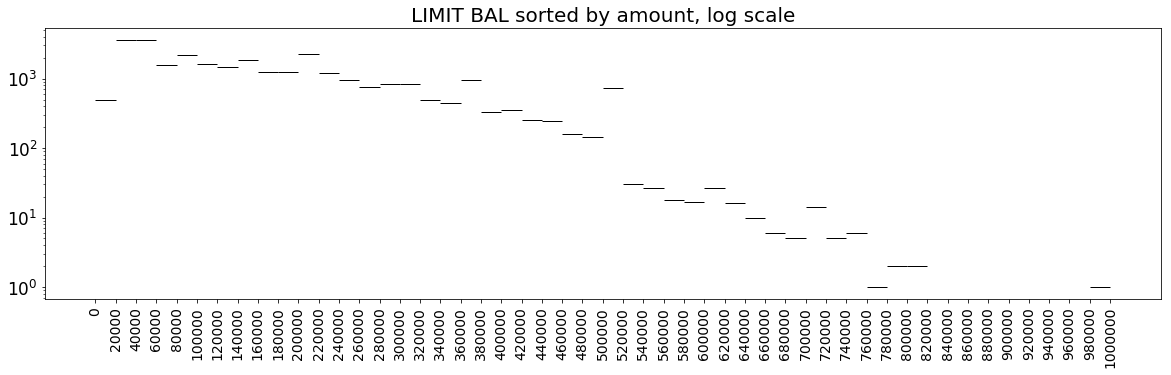

In [4]:
#limit balance, sorted by amount.
import matplotlib.pyplot as plt
bins= np.arange(0,1020000,20000)
_= plt.figure(figsize=(20,5))
_= plt.hist(df['LIMIT_BAL'], bins=bins, edgecolor="k")
_= plt.yscale("log")
_= plt.xticks(bins, rotation='vertical',size=14)
_= plt.yticks(size=17)
_= plt.title('LIMIT BAL sorted by amount, log scale', size=20)
plt.show()

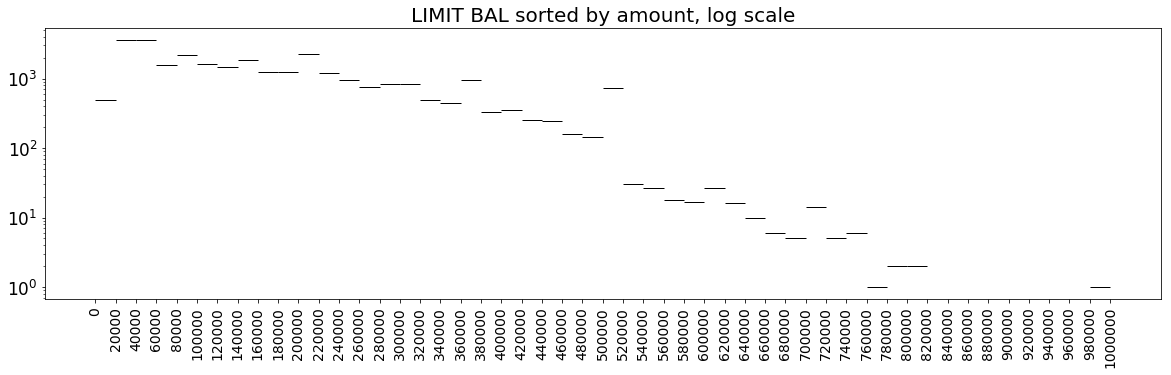

mean household credit: $ 167,484


In [17]:
# LIMIT_BAL, credit limit balance, sorted by amount.
bins= np.arange(0,1020000,20000)
_= plt.figure(figsize=(20,5))
_= plt.hist(clean_df['LIMIT_BAL'], bins=bins, edgecolor="k")
_= plt.yscale("log")
_= plt.xticks(bins, rotation='vertical',size=14)
_= plt.yticks(size=17)
_= plt.title('LIMIT BAL sorted by amount, log scale', size=20)
plt.show()
house = int(df['LIMIT_BAL'].mean())
print("mean household credit: $", format(house,',d'))

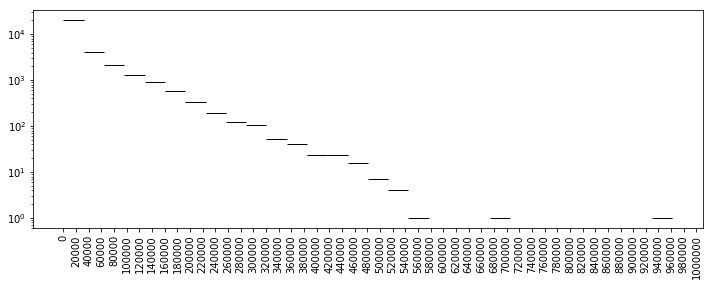

lowest value: 0
highest value: 961,664
total sum of all bills: 1,168,268,063
april bill mean: $ 38,871


In [13]:
#histogram of oldest month (6 months ago) amounts:
_= plt.figure(figsize=(12,4))
_= plt.hist(clean_df['BILL_AMT6'],bins=30, edgecolor="k")
_= plt.xticks(bins, rotation='vertical',size=10)
_= plt.yscale("log")
plt.show()
print('lowest value:', format(min(clean_df['BILL_AMT6']),',d'))
print('highest value:', format(max(clean_df['BILL_AMT6']),',d'))
AprSum= sum(clean_df['BILL_AMT6'])
print('total sum of all bills:', format(AprSum,',d'))
aprbillmean = int(df['BILL_AMT6'].mean())
print("april bill mean: $", format(aprbillmean,',d'))

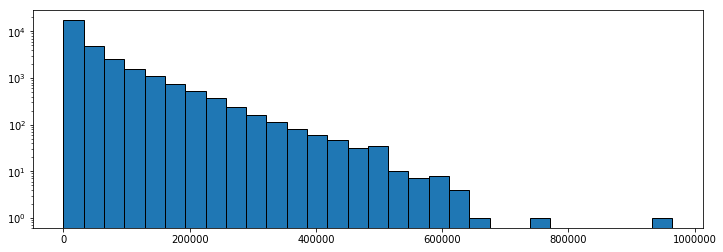

lowest value: 0
highest value: 964,511
total sum of all bills: 1,537,381,257
from April 1,168,268,063 to September 1,537,381,257 total bill amounts increased 369,113,194
percent gain, Apr to Sep:  0.3159
September bill mean: $ 51,223
mean household credit: $ 167,484
percentage of credit used: 0.3058


In [40]:
#histogram of most recent (one month ago) bill amounts:
_= plt.figure(figsize=(12,4))
_= plt.hist(clean_df['BILL_AMT1'],bins=30, edgecolor="k")
#_= plt.xticks(bins, rotation='vertical',size=10)
_= plt.yscale("log")
plt.show()
print('lowest value:', format(min(clean_df['BILL_AMT1']),',d'))
print('highest value:', format(max(clean_df['BILL_AMT1']),',d'))
SepSum= sum(clean_df['BILL_AMT1'])
print('total sum of all bills:', format(SepSum, ',d'))
print('from April', format(AprSum,',d'), 'to September', format(SepSum,',d'), 
      'total bill amounts increased', format(SepSum-AprSum,',d'))
print('percent gain, Apr to Sep: ', "%.4f" %((SepSum-AprSum)/AprSum))
sepbillmean = int(df['BILL_AMT1'].mean())
print("September bill mean: $", format(sepbillmean,',d'))
print("mean household credit: $", format(house,',d'))
print('percentage of credit used:', "%.4f" %(sepbillmean/house))

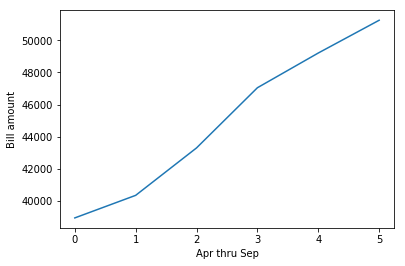

average bill amount in april 51223.3309
percent gain in average bill, Apr to Sep:  0.3159


In [24]:
#chart showing average bill amount, per month from April to September:
bill_amt_sep = clean_df['BILL_AMT1'].mean()
bill_amt_aug = clean_df['BILL_AMT2'].mean()
bill_amt_jul = clean_df['BILL_AMT3'].mean()
bill_amt_jun = clean_df['BILL_AMT4'].mean()
bill_amt_may = clean_df['BILL_AMT5'].mean()
bill_amt_apr = clean_df['BILL_AMT6'].mean()
plt.plot([bill_amt_apr,bill_amt_may,bill_amt_jun,bill_amt_jul,bill_amt_aug,bill_amt_sep])
plt.xlabel('Apr thru Sep')
plt.ylabel('Bill amount')
plt.show()
print('average bill amount in april', df['BILL_AMT1'].mean())
print('percent gain in average bill, Apr to Sep: ', 
      "%.4f" %((bill_amt_sep-bill_amt_apr)/bill_amt_apr))

Now let's look at Payment amounts:
<h4> PAY AMOUNT HISTORY: PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6 </h4>
Show the pay history, for the entire data set, using mean.  

I notice that only a small amount 11% of the average bill amount is paid in September, down from 13% in April.  Most accounts carry a balance.  Like BILL_AMT, PAY_AMT increased over time.  
Payment amounts in PAY_AMT1, the most recent month, range from 0 to 873552.  
Most bills are zero, or near zero.  There were no negative payments.  I cannot measure any errors in data.    

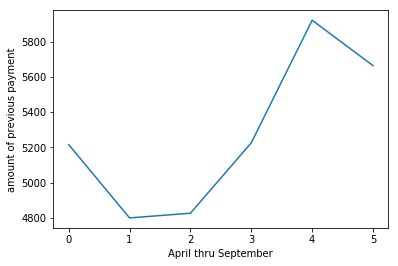

mean pay amount in Sep:  5663.5805
percent of total bill amounts paid in Sep:  0.1106
percent of total bill amounts paid in Apr:  0.1342


In [7]:
pymt_amt_sep = df['PAY_AMT1'].mean()
pymt_amt_aug = df['PAY_AMT2'].mean()
pymt_amt_jul = df['PAY_AMT3'].mean()
pymt_amt_jun = df['PAY_AMT4'].mean()
pymt_amt_may = df['PAY_AMT5'].mean()
pymt_amt_apr = df['PAY_AMT6'].mean()
plt.plot([pymt_amt_apr,pymt_amt_may,pymt_amt_jun,pymt_amt_jul,pymt_amt_aug,pymt_amt_sep])
plt.xlabel('April thru September')
plt.ylabel('amount of previous payment')
plt.show()
print('mean pay amount in Sep: ', pymt_amt_sep)
print('percent of total bill amounts paid in Sep: ',"%.4f" %(pymt_amt_sep/bill_amt_sep))
print('percent of total bill amounts paid in Apr: ',"%.4f" %(pymt_amt_apr/bill_amt_apr))

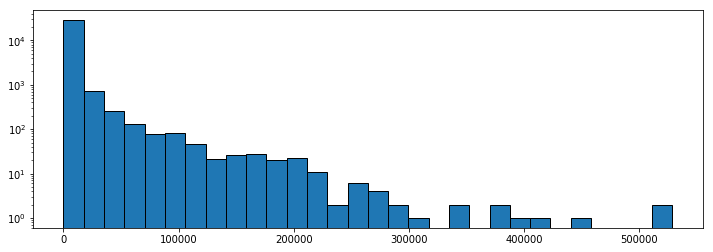

lowest value: 0
highest value: 528,666
total sum of all payments: 156,465,077


In [8]:
#histogram of oldest month (6 months ago) payment amounts:
_= plt.figure(figsize=(12,4))
_= plt.hist(clean_df['PAY_AMT6'],bins=30, edgecolor="k")
#_= plt.xticks(bins, rotation='vertical',size=10)
_= plt.yscale("log")
plt.show()
print('lowest value:', format(min(clean_df['PAY_AMT6']),',d'))
print('highest value:', format(max(clean_df['PAY_AMT6']),',d'))
AprSum= sum(clean_df['PAY_AMT6'])
print('total sum of all payments:', format(AprSum,',d'))

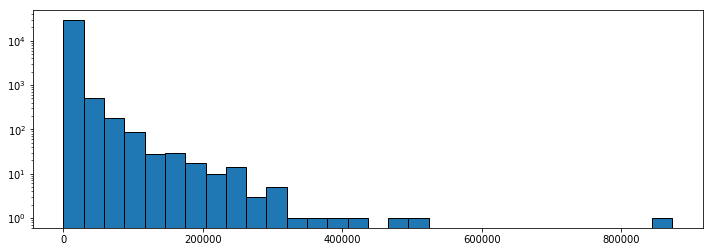

lowest value: 0
highest value: 873,552
total sum of all payments: 169,907,415
from April 156,465,077 to September 169,907,415 total payment amounts increased 13,442,338
percent gain, Apr to Sep:  0.0859


In [9]:
#histogram of most recent (one month ago) payment amounts:
_= plt.figure(figsize=(12,4))
_= plt.hist(clean_df['PAY_AMT1'],bins=30, edgecolor="k")
#_= plt.xticks(bins, rotation='vertical',size=10)
_= plt.yscale("log")
plt.show()
print('lowest value:', format(min(clean_df['PAY_AMT1']),',d'))
print('highest value:', format(max(clean_df['PAY_AMT1']),',d'))
SepSum= sum(clean_df['PAY_AMT1'])
print('total sum of all payments:', format(SepSum, ',d'))
print('from April', format(AprSum,',d'), 'to September', format(SepSum,',d'), 
      'total payment amounts increased', format(SepSum-AprSum,',d'))
print('percent gain, Apr to Sep: ', "%.4f" %((SepSum-AprSum)/AprSum))

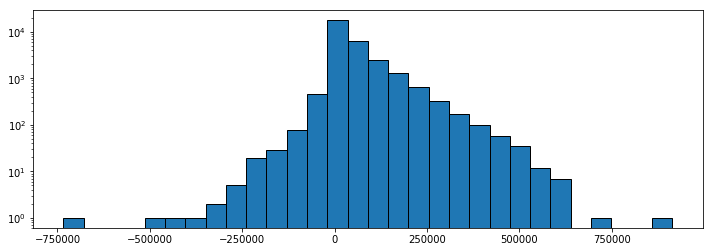

Negative amounts show overpayments.  On balance, more bills were underpaid than overpaid.


In [30]:
#create graph of difference of most recent (one month ago): bill amt - pay amt
_= plt.figure(figsize=(12,4))
_= plt.hist(clean_df['BILL_AMT1']-clean_df['PAY_AMT1'],bins=30, edgecolor="k")
#_= plt.xticks(bins, rotation='vertical',size=10)
_= plt.yscale("log")
plt.show()
print('Negative amounts show overpayments.  On balance, more bills were underpaid than overpaid.')

testing.  just testing.  practice git push and pull.